<a href="https://colab.research.google.com/github/Meet200/-Algorithms-in-python/blob/master/INCOME_POKER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Linear regression"

/content/drive/My Drive/Colab Notebooks/Linear regression


In [5]:

col_names=['s1','c1','s2','c2','s3','c3','s4','c4','s5','c5','classes' ]
dataset = pd.read_csv("poker-hand-training-true.data",names=col_names)
print(dataset)
dataset.shape

       s1  c1  s2  c2  s3  c3  s4  c4  s5  c5  classes
0       1  10   1  11   1  13   1  12   1   1        9
1       2  11   2  13   2  10   2  12   2   1        9
2       3  12   3  11   3  13   3  10   3   1        9
3       4  10   4  11   4   1   4  13   4  12        9
4       4   1   4  13   4  12   4  11   4  10        9
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..      ...
25005   3   9   2   6   4  11   4  12   2   4        0
25006   4   1   4  10   3  13   3   4   1  10        1
25007   2   1   2  10   4   4   4   1   4  13        1
25008   2  12   4   3   1  10   1  12   4   9        1
25009   1   7   3  11   3   3   4   8   3   7        1

[25010 rows x 11 columns]


(25010, 11)

In [6]:
dataset_test = pd.read_csv("poker-hand-testing.data",names=col_names)
print(dataset_test)
dataset_test.shape

        s1  c1  s2  c2  s3  c3  s4  c4  s5  c5  classes
0        1   1   1  13   2   4   2   3   1  12        0
1        3  12   3   2   3  11   4   5   2   5        1
2        1   9   4   6   1   4   3   2   3   9        1
3        1   4   3  13   2  13   2   1   3   6        1
4        3  10   2   7   1   2   2  11   4   9        0
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..      ...
999995   3   1   1  12   2   9   4   9   2   6        1
999996   3   3   4   5   2   7   1   4   4   3        1
999997   1  11   4   7   3   9   1  13   2   7        1
999998   3  11   1   8   1   1   3  13   2   8        1
999999   2   5   2   9   4   9   2   3   3   3        2

[1000000 rows x 11 columns]


(1000000, 11)

In [7]:
# Data visulization

no_class = 10  # we have 10 classes of poker hands
cls = {}
for i in range(no_class):
    cls[i] = len(dataset[dataset.classes==i])
print(cls)

# Giving name to diferent class to visulize it
poker_hands = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
hand_name = {
    0: 'Nothing in hand',
    1: 'One pair',
    2: 'Two pairs',
    3: 'Three of a kind',
    4: 'Straight',
    5: 'Flush',
    6: 'Full house',
    7: 'Four of a kind',
    8: 'Straight flush',
    9: 'Royal flush',
}

{0: 12493, 1: 10599, 2: 1206, 3: 513, 4: 93, 5: 54, 6: 36, 7: 6, 8: 5, 9: 5}


In [8]:
for i in poker_hands:
    print("%s: %d" % (hand_name[i], cls[i]))

Nothing in hand: 12493
One pair: 10599
Two pairs: 1206
Three of a kind: 513
Straight: 93
Flush: 54
Full house: 36
Four of a kind: 6
Straight flush: 5
Royal flush: 5


Text(0, 0.5, 'Number of instances')

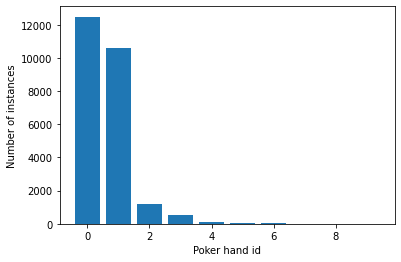

In [9]:
plt.bar(poker_hands, [cls[i] for i in poker_hands], align='center')
plt.xlabel('Poker hand id')
plt.ylabel('Number of instances')

In [10]:
# taking Species name in y and all other in x variable
x = dataset.drop(['classes'], axis=1)
y = dataset['classes']

In [11]:
# spliting data in train and test dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=110) # here 33% dataset will be of testing and 67% will be for training

As this problem is of classification and having more then 2 class so it is better that we should go with KNN classifier if will use Logistic then we have to apply one hot encoding or use one v/s all algorithm so better then that will direct use some other classification technique 

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(6, p=6)

In [13]:
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=6,
                     weights='uniform')

In [14]:
# printing of classification report
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(classification_report(y_test, knc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.77      0.66      4120
           1       0.53      0.42      0.47      3498
           2       0.29      0.03      0.06       395
           3       0.27      0.02      0.03       180
           4       0.00      0.00      0.00        34
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.56      8254
   macro avg       0.17      0.12      0.12      8254
weighted avg       0.54      0.56      0.53      8254



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


we can see in abover table we are getting overall 56% accuracy while for diffrent set accuracy is present in above graph

Now for testing dataset

In [15]:
x_test_data = dataset_test.drop(['classes'], axis=1)
y_test_data = dataset_test['classes']

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(classification_report(y_test_data, knc.predict(x_test_data)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      0.76      0.66    501209
           1       0.52      0.41      0.45    422498
           2       0.22      0.02      0.04     47622
           3       0.16      0.01      0.02     21121
           4       0.03      0.00      0.00      3885
           5       0.00      0.00      0.00      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.56   1000000
   macro avg       0.15      0.12      0.12   1000000
weighted avg       0.52      0.56      0.52   1000000



#Question2

In [17]:
dataset2 = pd.read_csv("Question 2.csv")
print(dataset2)
dataset2.shape

     INCOME  SPEND
0       233    150
1       250    187
2       204    172
3       236    178
4       354    163
..      ...    ...
298     241    123
299     264    132
300     193    141
301     131    115
302     236    174

[303 rows x 2 columns]


(303, 2)

In [18]:
#some data visulization
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

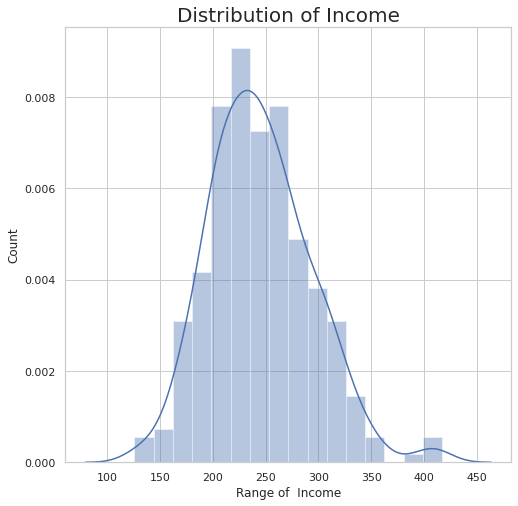

In [19]:
plt.rcParams['figure.figsize'] = (8, 8)
sns.set(style = 'whitegrid')
sns.distplot(dataset2['INCOME'])
plt.title('Distribution of Income', fontsize = 20)
plt.xlabel('Range of  Income')
plt.ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


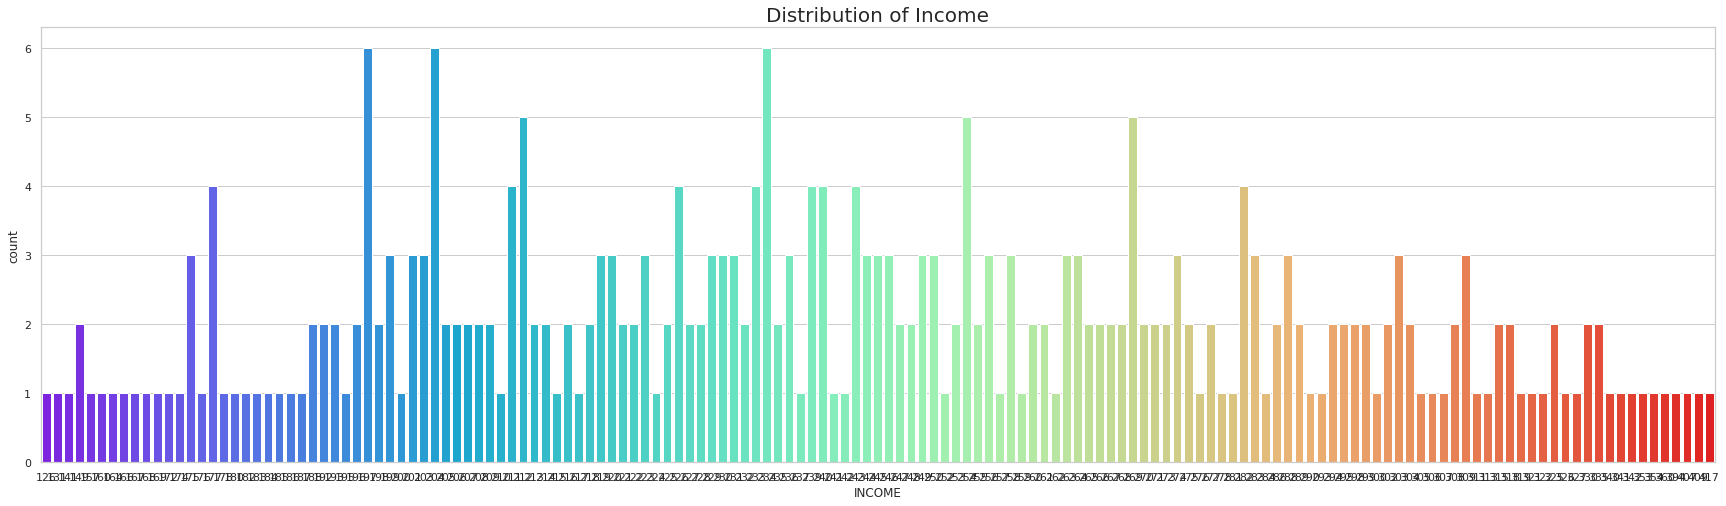

In [20]:
plt.rcParams['figure.figsize'] = (30, 8)
sns.countplot(dataset2['INCOME'], palette = 'rainbow')
plt.title('Distribution of Income', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


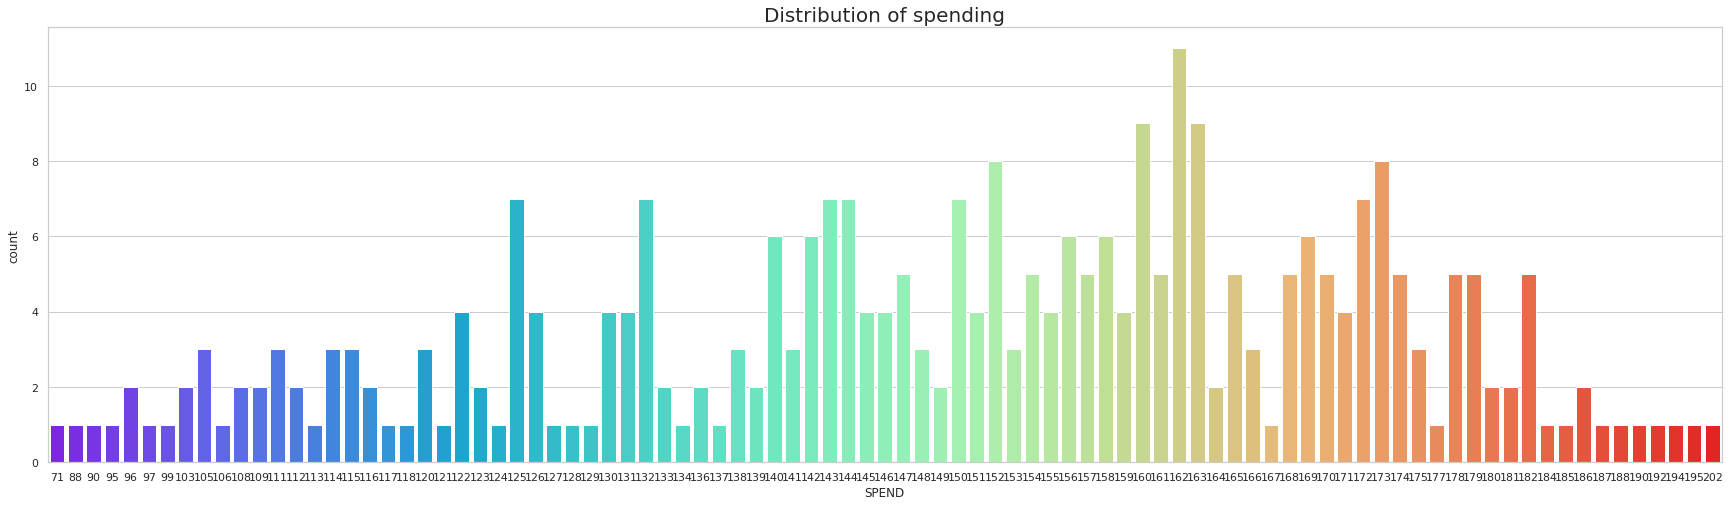

In [21]:
plt.rcParams['figure.figsize'] = (30, 8)
sns.countplot(dataset2['SPEND'], palette = 'rainbow')
plt.title('Distribution of spending', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


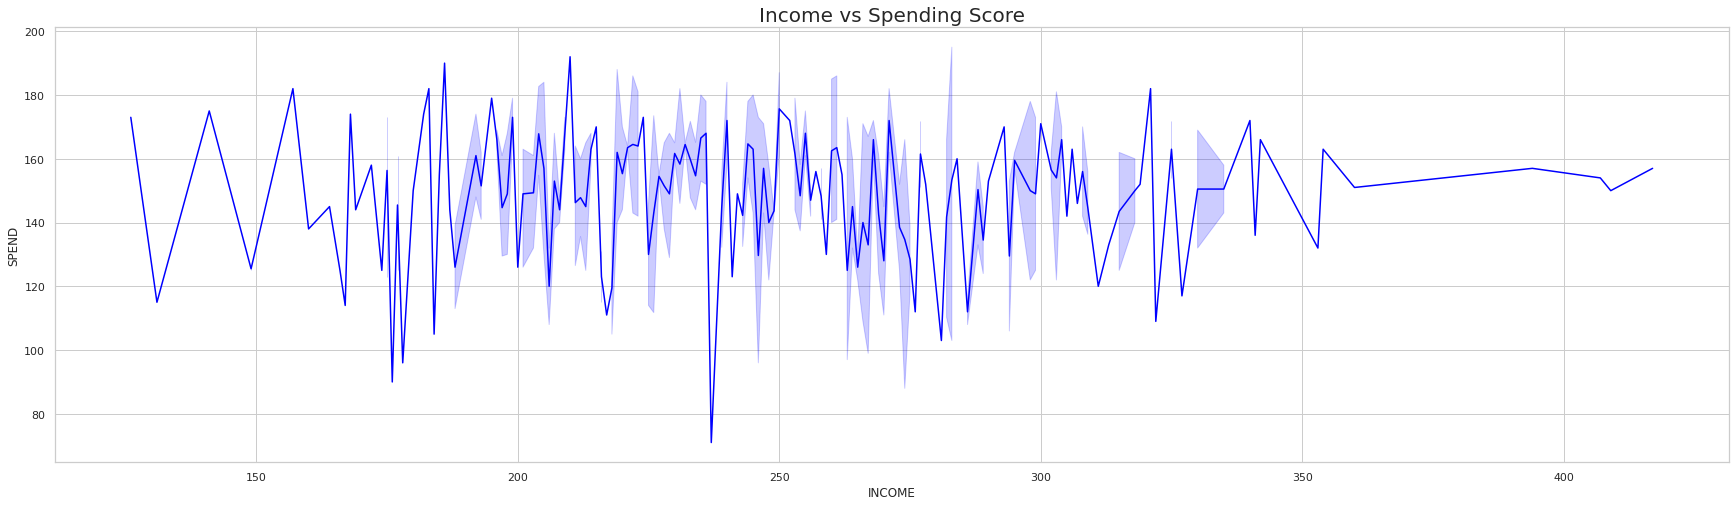

In [22]:
x = dataset2['INCOME']
y = dataset2['SPEND']


sns.lineplot(x, y, color = 'blue')
plt.title('Income vs Spending Score', fontsize = 20)
plt.show()

Looking towards question it seems like we need to seprarate it in diffrent clusters we can apply k-means clustering here

In [23]:
 X= dataset2.iloc[:, [0,1]].values
 X

array([[233, 150],
       [250, 187],
       [204, 172],
       [236, 178],
       [354, 163],
       [192, 148],
       [294, 153],
       [263, 173],
       [199, 162],
       [168, 174],
       [239, 160],
       [275, 139],
       [266, 171],
       [211, 144],
       [283, 162],
       [219, 158],
       [340, 172],
       [226, 114],
       [247, 171],
       [239, 151],
       [234, 161],
       [233, 179],
       [226, 178],
       [243, 137],
       [199, 178],
       [302, 162],
       [212, 157],
       [175, 123],
       [417, 157],
       [197, 152],
       [198, 168],
       [177, 140],
       [219, 188],
       [273, 152],
       [213, 125],
       [177, 160],
       [304, 170],
       [232, 165],
       [269, 148],
       [360, 151],
       [308, 142],
       [245, 180],
       [208, 148],
       [264, 143],
       [321, 182],
       [325, 172],
       [235, 180],
       [257, 156],
       [216, 115],
       [234, 160],
       [256, 149],
       [302, 151],
       [231,

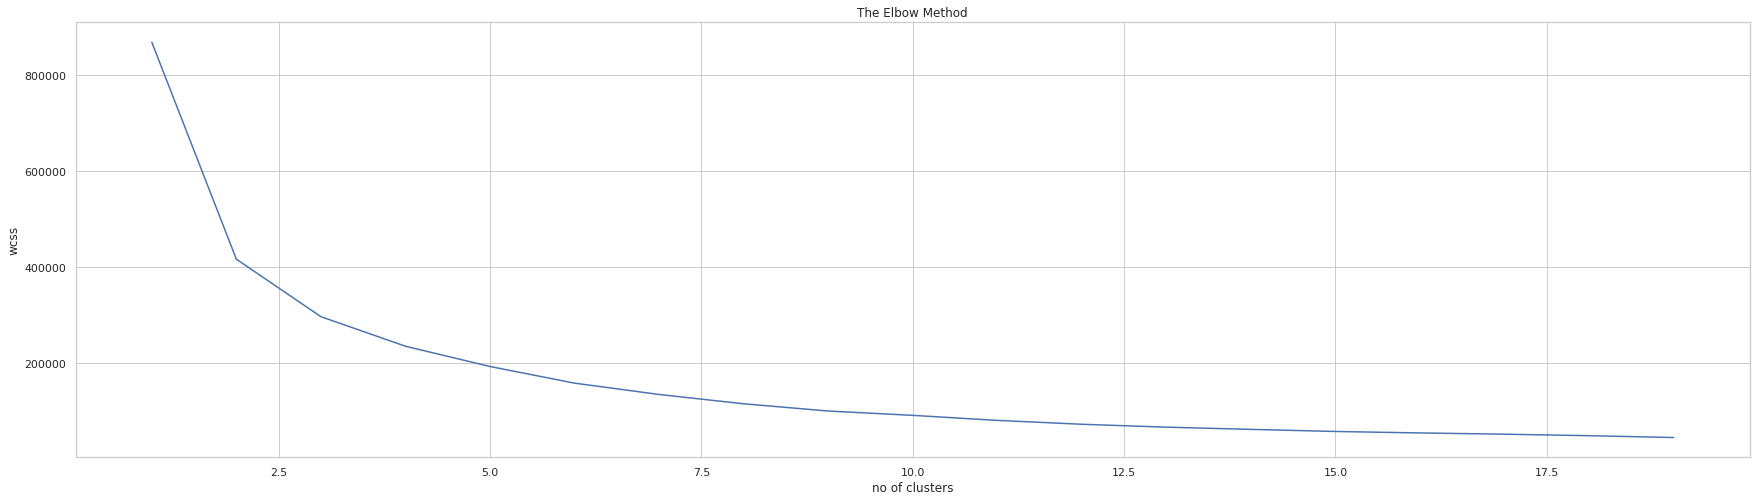

In [24]:
from sklearn.cluster import KMeans
#Elbow method
wcss=[]
for i in range(1,20):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

we can see that we can select value of k=5

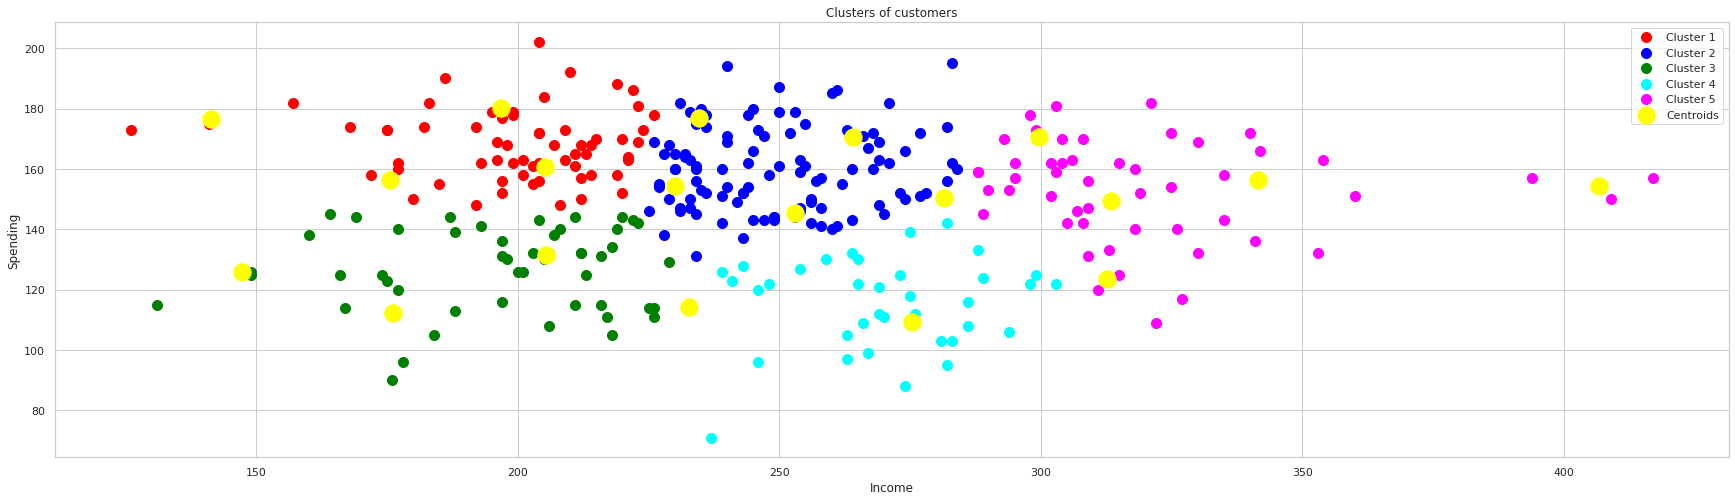

In [25]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)


plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.legend()
plt.show()



*   Here in the above graph we can see people in magenta having good income and leaving luxury life
*   people with red color dots are living luxury life despite of having low income
*   people in green having less income and can not spend money on luxury life
*   people in cyan color is having good income but they are saving money for the security






